In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download puneet6060/intel-image-classification

 99% 344M/346M [00:16<00:00, 19.9MB/s]
100% 346M/346M [00:16<00:00, 22.1MB/s]


In [ ]:
! unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
import os

In [ ]:
train_dir = "/content/seg_train/seg_train"
test_dir = "/content/seg_test/seg_test"

In [ ]:
folders = ["buildings","forest","glacier","mountain","sea","street"]

In [ ]:
train_buildings_dir = os.path.join(train_dir,folders[0])
train_forest_dir = os.path.join(train_dir,folders[1])
train_glacier_dir = os.path.join(train_dir,folders[2])
train_mountain_dir = os.path.join(train_dir,folders[3])
train_sea_dir = os.path.join(train_dir,folders[4])
train_street_dir = os.path.join(train_dir,folders[5])

In [ ]:
test_buildings_dir = os.path.join(test_dir,folders[0])
test_forest_dir = os.path.join(test_dir,folders[1])
test_glacier_dir = os.path.join(test_dir,folders[2])
test_mountain_dir = os.path.join(test_dir,folders[3])
test_sea_dir = os.path.join(test_dir,folders[4])
test_street_dir = os.path.join(test_dir,folders[5])

In [ ]:
train_buildings = os.listdir(train_buildings_dir)
train_forest = os.listdir(train_forest_dir)
train_glacier = os.listdir(train_glacier_dir)
train_mountain = os.listdir(train_mountain_dir)
train_sea = os.listdir(train_sea_dir)
train_street = os.listdir(train_street_dir)

In [ ]:
test_buildings = os.listdir(test_buildings_dir)
test_forest = os.listdir(test_forest_dir)
test_glacier = os.listdir(test_glacier_dir)
test_mountain = os.listdir(test_mountain_dir)
test_sea = os.listdir(test_sea_dir)
test_street = os.listdir(test_street_dir)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
print(f'Total Training {folders[0]} images : {len(train_buildings)}')
print(f'Total Training {folders[1]} images : {len(train_forest)}')
print(f'Total Training {folders[2]} images : {len(train_glacier)}')
print(f'Total Training {folders[3]} images : {len(train_mountain)}')
print(f'Total Training {folders[4]} images : {len(train_sea)}')
print(f'Total Training {folders[5]} images : {len(train_street)}')

Total Training buildings images : 2191
Total Training forest images : 2271
Total Training glacier images : 2404
Total Training mountain images : 2512
Total Training sea images : 2274
Total Training street images : 2382


In [ ]:
total_train_imgs = (len(train_street) + len(train_forest) + len(train_glacier) + len(train_mountain) + len(train_sea) + len(train_street))
total_train_imgs

14225

In [ ]:
print(f'Total Test {folders[0]} images : {len(test_buildings)}')
print(f'Total Test {folders[1]} images : {len(test_forest)}')
print(f'Total Test {folders[2]} images : {len(test_glacier)}')
print(f'Total Test {folders[3]} images : {len(test_mountain)}')
print(f'Total Test {folders[4]} images : {len(test_sea)}')
print(f'Total Test {folders[5]} images : {len(test_street)}')

Total Test buildings images : 437
Total Test forest images : 474
Total Test glacier images : 553
Total Test mountain images : 525
Total Test sea images : 510
Total Test street images : 501


In [ ]:
total_test_imgs = (len(test_street) + len(test_forest) + len(test_glacier) + len(test_mountain) + len(test_sea) + len(test_street))
total_test_imgs

3064

In [ ]:
def plot_images(dir,fnames):
    figure = plt.figure(figsize=(20,10))
    for i in range(12):
      sp = plt.subplot(2,6,i+1)
      plt.imshow(mpimg.imread(os.path.join(dir,fnames[i])))
      

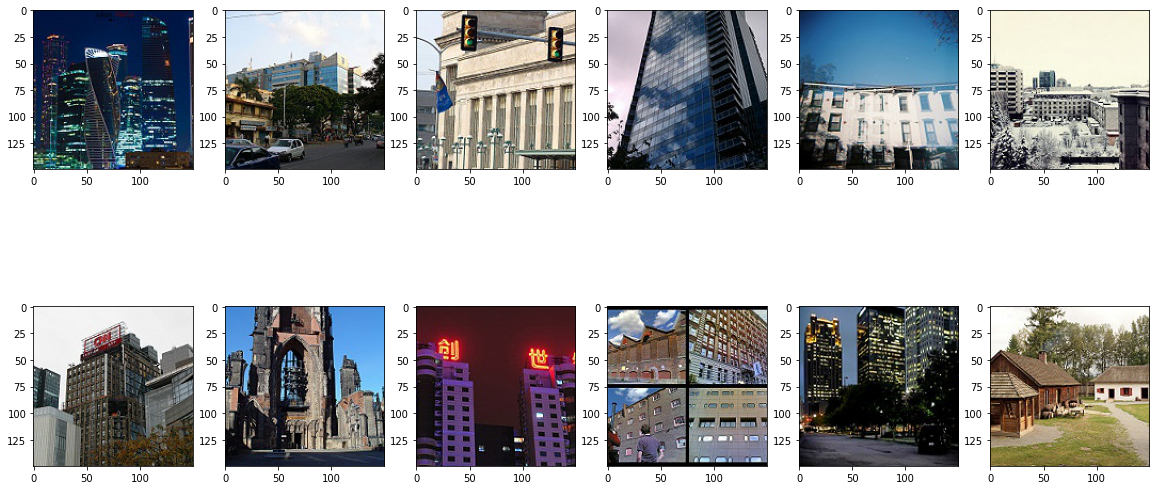

In [ ]:
plot_images(train_buildings_dir,train_buildings)

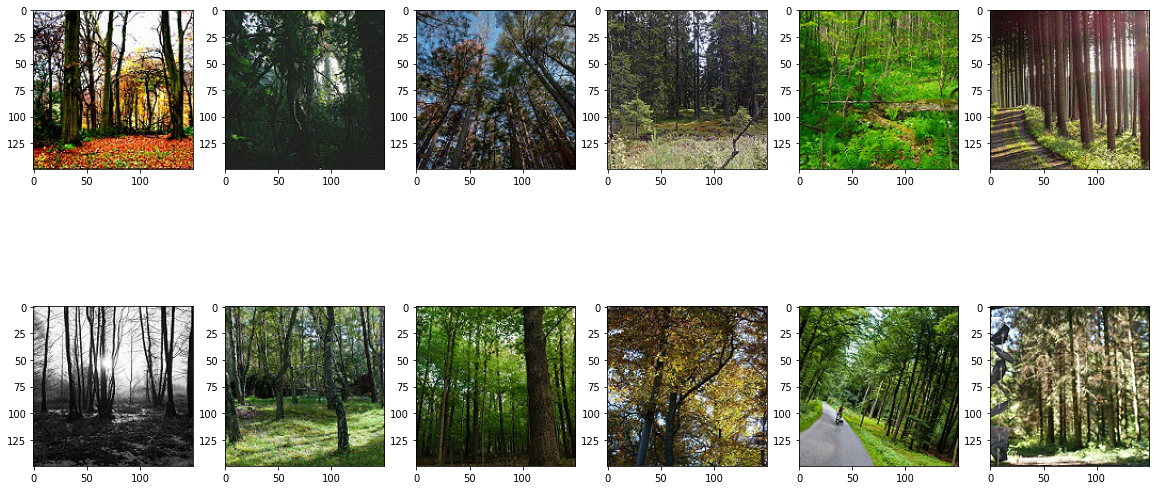

In [ ]:
plot_images(train_forest_dir,train_forest)
            

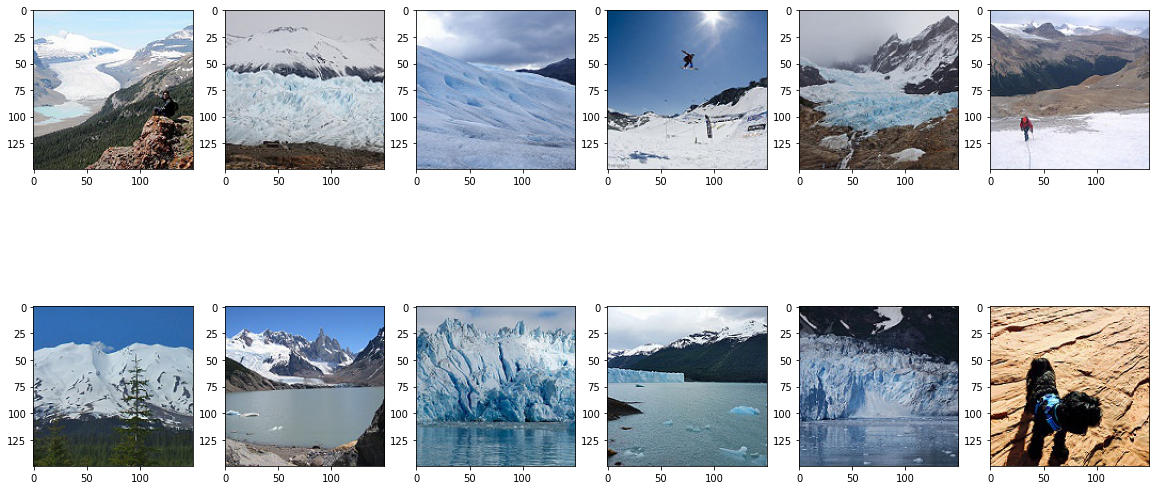

In [ ]:
plot_images(train_glacier_dir,train_glacier)

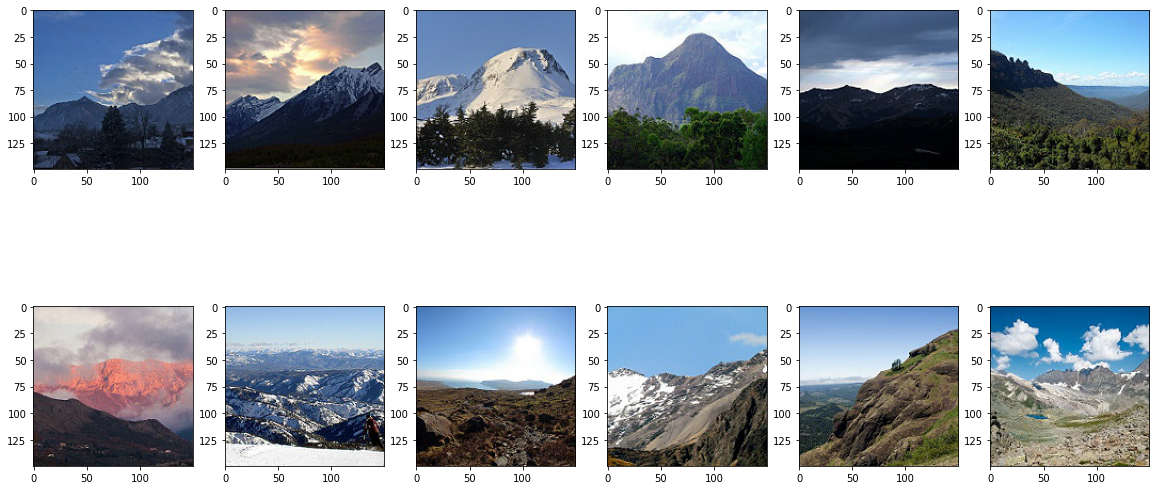

In [ ]:
plot_images(train_mountain_dir,train_mountain)

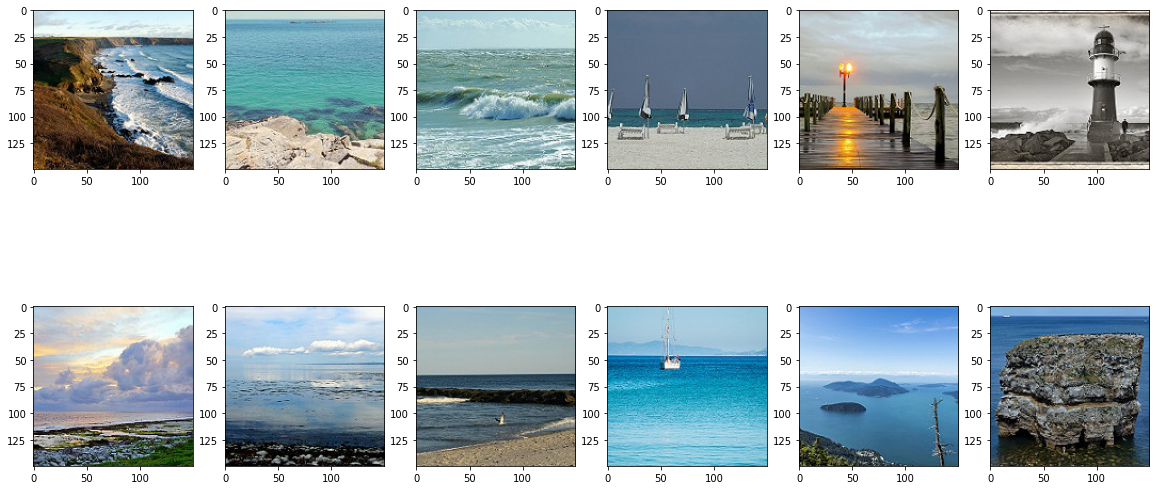

In [ ]:
plot_images(train_sea_dir,train_sea)

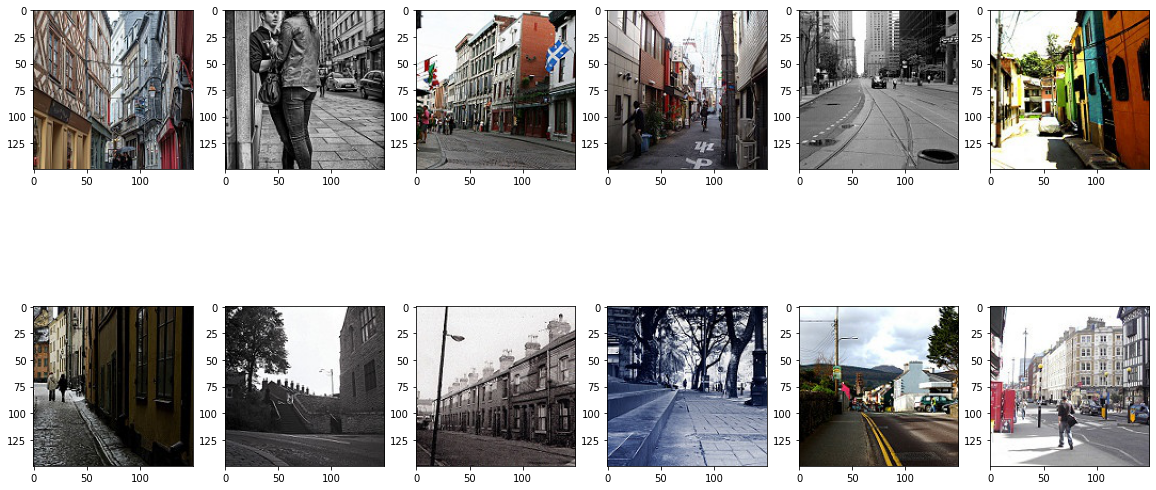

In [ ]:
plot_images(train_street_dir,train_street)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 512,
                                                    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size = (150,150),
                                                    batch_size = 512,
                                                    class_mode = 'categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
from tensorflow.keras import layers, Model, regularizers

In [ ]:
img_input = layers.Input(shape=(150,150,3))

x = layers.Conv2D(16,3,activation = 'relu',kernel_regularizer=regularizers.l2(l=0.01) ,padding = 'same')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32,3,activation = 'relu', kernel_regularizer=regularizers.l2(l=0.01) ,padding = 'same')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64,3,activation = 'relu', kernel_regularizer=regularizers.l2(l=0.01) ,padding = 'same')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128,3,activation = 'relu', kernel_regularizer=regularizers.l2(l=0.01) ,padding = 'same')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512,activation = 'relu', )(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(512,activation = 'relu', )(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(6,activation = 'softmax')(x)

model = Model(img_input,output)

# Training Accuracy = 0.9728 
# Validation Accuracy = 0.8300

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 128)       73856 

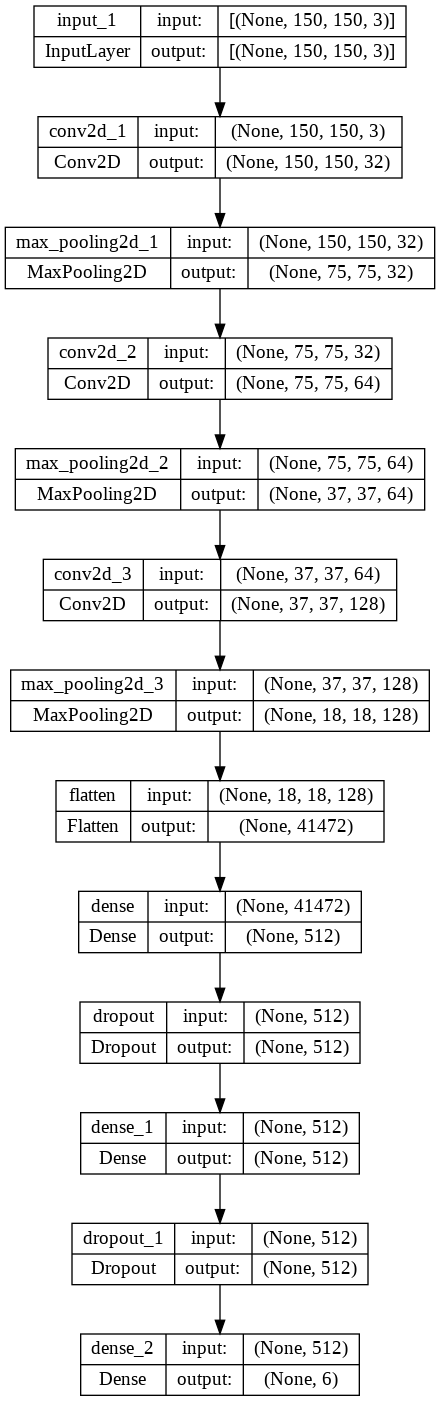

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes = 'True')

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = 'acc')

In [ ]:
stats = model.fit(train_generator,
                  batch_size = 512,
                  epochs = 32,
                  validation_data = test_generator,
                  )

Epoch 1/32
28/28 [==============================] - 47s 1s/step - loss: 2.3515 - acc: 0.4553 - val_loss: 1.7296 - val_acc: 0.6017
Epoch 2/32
28/28 [==============================] - 28s 986ms/step - loss: 1.5900 - acc: 0.6221 - val_loss: 1.4272 - val_acc: 0.6770
Epoch 3/32
28/28 [==============================] - 29s 1s/step - loss: 1.3351 - acc: 0.6791 - val_loss: 1.2118 - val_acc: 0.7150
Epoch 4/32
28/28 [==============================] - 24s 853ms/step - loss: 1.1410 - acc: 0.7357 - val_loss: 1.0632 - val_acc: 0.7630
Epoch 5/32
28/28 [==============================] - 25s 906ms/step - loss: 1.0219 - acc: 0.7669 - val_loss: 0.9625 - val_acc: 0.7847
Epoch 6/32
28/28 [==============================] - 23s 824ms/step - loss: 0.9327 - acc: 0.7871 - val_loss: 0.9560 - val_acc: 0.7767
Epoch 7/32
28/28 [==============================] - 26s 919ms/step - loss: 0.8445 - acc: 0.8115 - val_loss: 0.8352 - val_acc: 0.8187
Epoch 8/32
28/28 [==============================] - 26s 916ms/step - loss: 

KeyboardInterrupt: ignored

In [ ]:
acc = stats.history['acc']
val_acc = stats.history['val_acc']

epochs = range(len(acc))

In [ ]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

In [ ]:
loss = stats.history['loss']
val_loss = stats.history['val_loss']

epochs = range(len(loss))

In [ ]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

In [ ]:
X_test = []

validation_dir = "/content/seg_pred/seg_pred"

validation_fnames = os.listdir(validation_dir)

for img in os.listdir(validation_dir):
  image = c2.imread(os.path.join(validation_dir,img))
  X_test.append(image)